# Enantiomers Project Molecule Selection

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import pyrfume
from pyrfume.odorants import from_cids, get_cids, canonical_smiles
import ratatouille as rt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import seaborn as sns
from umap import UMAP
sns.set_style('whitegrid')

### Load available molecules and their embeddings

In [3]:
# TODO (later): Load embeddings for all molecules
#emb = np.load('gnn_embeddings.npz', allow_pickle=True)
#emb = pd.DataFrame(emb['prediction'], index=emb['smiles'])

# Load your dataframe of available molecules
#df = pd.read_csv(...)

### Fill the molecule library dataframe with cost

In [5]:
df['cost'] = np.random.rand(len(df))

There are 346 SMILES remaining.


In [9]:
# TODO (later): Compute pairwise embedding distances
#distances = pd.DataFrame(cdist(emb, emb), index=emb.index, columns=emb.index)

### Run the optimizer

In [18]:
# THe optimizer class
from pyrfume.optimization import OdorantSetOptimizer
from pyrfume.optimization import get_coverage, get_spacing, get_entropy

# Initialize it; see pyrfume.optimization for documentation
# Third value in each triple is the weight
oso = OdorantSetOptimizer(df,
                          n_desired=25,
                          n_gen=50,
                          keep=None,#keep_set,
                          standardize_weights=True,
                          weights=[
    ('cost', 'mean', -5),
    #('entropy', (get_entropy, emb_pca), 10),
    #('spacing', (get_spacing, distances), 10),
    #('coverages', (get_coverage, emb_pca), 10),
    ])

In [19]:
# Run and store results
pop, stats, hof, logbook = oso.run(quiet=True)

gen	nevals	avg                               	best                                             
0  	100   	[3.48245603 0.06894663 0.12644037]	[21.1793517   3.48245603  2.41231201  1.44685118]
1  	159   	[3.48245603 0.98169822 0.97957875]	[25.04955141  3.48245603  2.41231201  1.83387115]
2  	154   	[3.48245603 1.39898529 1.24016371]	[25.04955141  3.48245603  2.41231201  1.83387115]
3  	157   	[3.48245603 1.84944649 1.35158505]	[35.57985102  3.48245603  3.12751028  2.17170284]
4  	151   	[3.48245603 2.05121963 1.82933836]	[35.57985102  3.48245603  3.12751028  2.17170284]
5  	149   	[3.48245603 2.32818923 1.98181467]	[38.96758079  3.48245603  2.20644636  3.43153973]
6  	156   	[3.48245603 2.55750306 2.17896623]	[43.39245983  3.48245603  2.64893427  3.43153973]
7  	157   	[3.48245603 2.82701304 2.29262244]	[51.7411599   3.48245603  3.95925854  2.95608547]
8  	151   	[3.48245603 2.92513276 2.53707806]	[53.01085081  3.48245603  4.06219136  2.98012174]
9  	151   	[3.48245603 2.99952057 2.7894

### Display the results

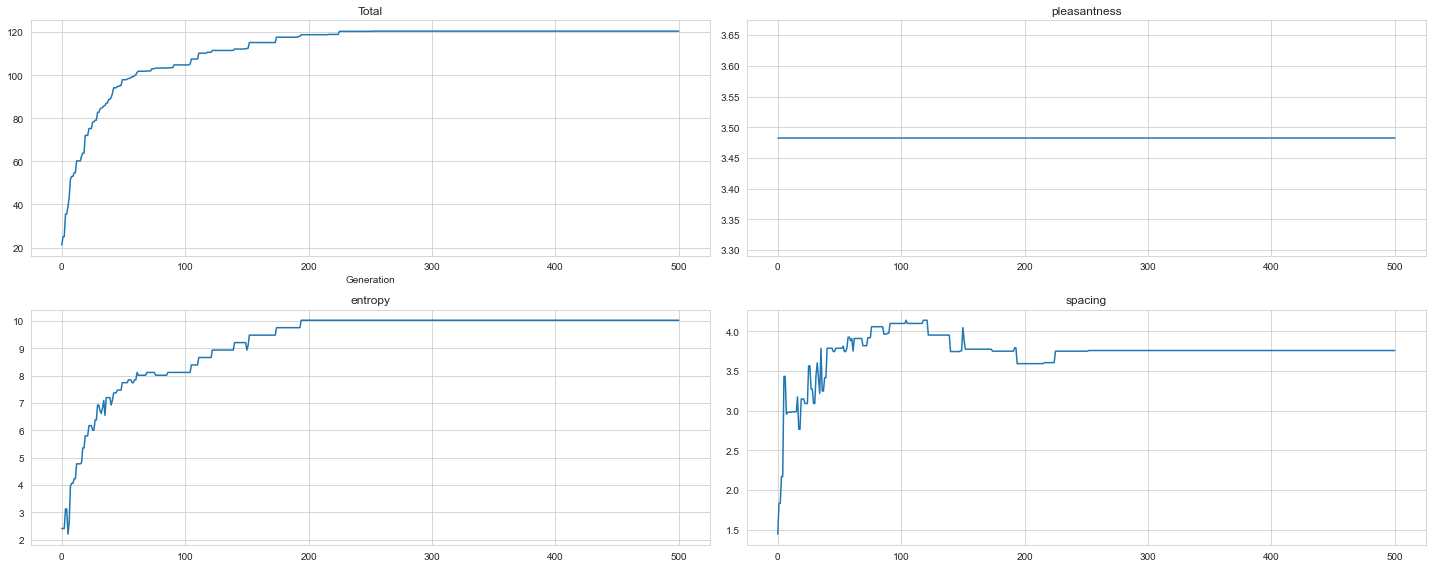

In [20]:
# Show the fitness of the population for each objective as a function of the number of generations
# "Total" is the weighted sum of all of the others.
oso.plot_score_history()

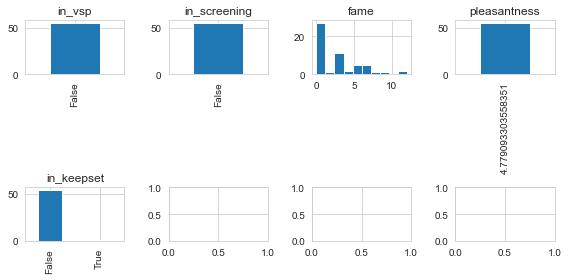

In [21]:
# Summarize the (categorical or continuous) distribution of each value in the
# selected molecules.
# Select others (besides the most fit candidate) by passing arguments to .summarize_gene()
oso.summarize_gene()

(4553, 2) (4553,)


<Figure size 2160x2160 with 0 Axes>

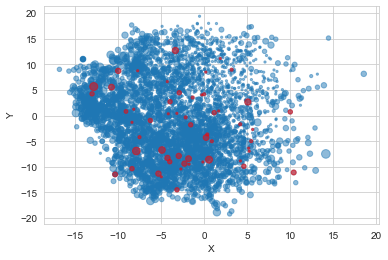

In [22]:
# Show the selected molecules (red) in the 2d projection of the embeddings space of all molecules (blue)
# Make the size of the selected molecule equal to its "fame"
#plt.figure(figsize=(30, 30))
#oso.embed_gene_2d(emb_pca.loc[dfc.index], size_col='fame', size=(5, 5))

In [23]:
#best = df.iloc[list(hof[0])].index.tolist()
#cids = get_cids(best)

  0%|          | 0/55 [00:00<?, ?it/s]

In [24]:
#best_molecules = pd.DataFrame(from_cids(list(cids.values()))).set_index('CID')

  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#best_molecules.sort_index().to_csv('mixture_molecules_candidates_55.csv')

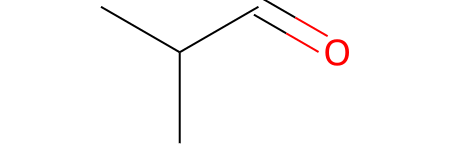

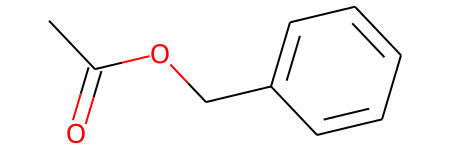

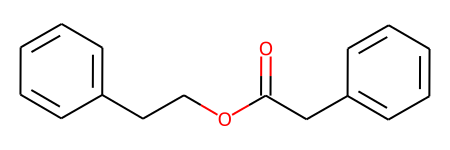

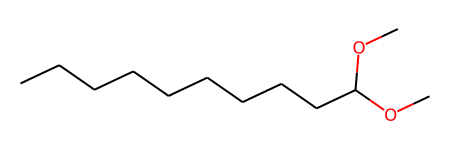

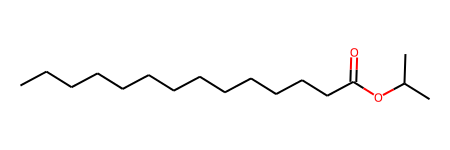

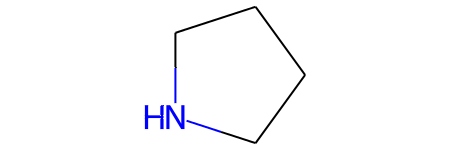

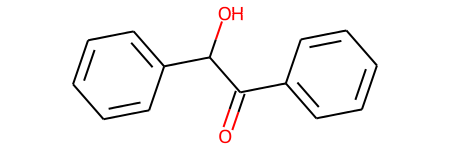

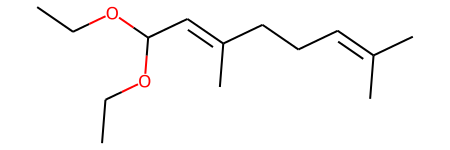

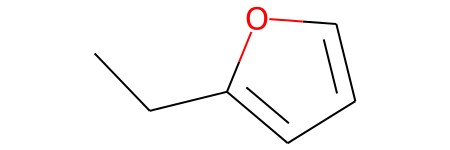

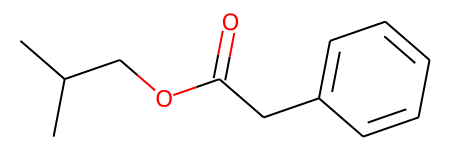

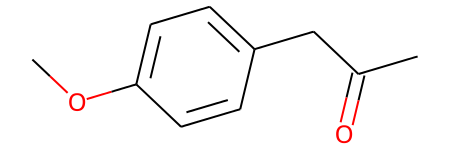

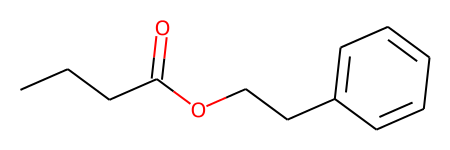

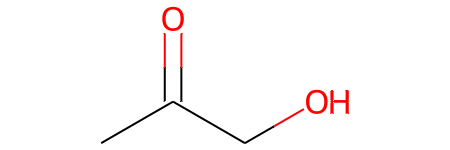

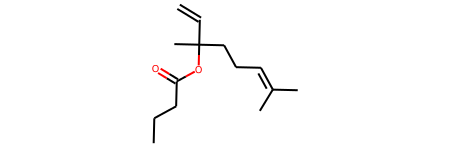

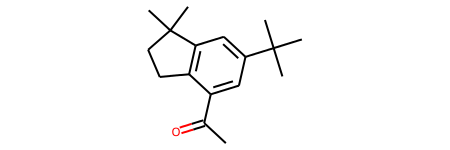

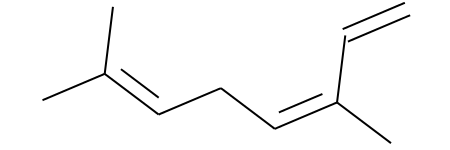

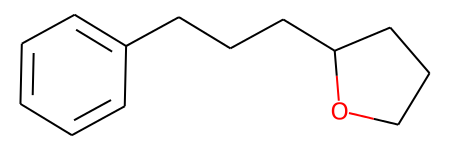

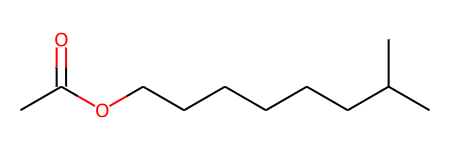

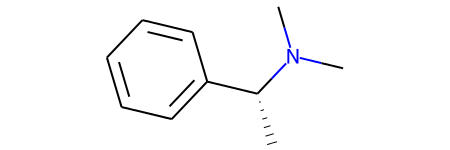

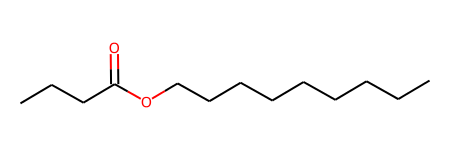

In [26]:
# hof contains the all-time best genes across all-generations
# hof[0] is the very best one
# These are integer indices into the library of possible molecules
best = list(hof[0])

# Show the most famous 20 out of the best set
z = df.iloc[best]['cost'].sort_values(ascending=False).head(5).index
from IPython.display import display
for sm in z:
    from rdkit.Chem import MolFromSmiles
    display(MolFromSmiles(sm))